In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

In [3]:
#DATA CLEANING CELL
my_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
# print(len(my_data.columns))
my_data = my_data.drop(columns=['Vict Descent','Status','Status Desc'])
# print(len(my_data.columns))
all_c = list(my_data.columns)
final = []
for i in all_c:
    if 'Crm' not in i:
        final.append(i)
final.append('Crm Cd 1')
# print(len(final))
my_data.dropna(inplace=True,subset=final)
# my_data = my_data[my_data['LON'] != 0]
# my_data = my_data[my_data['LAT'] != 0]

print(len(my_data))

67385


In [4]:
#attempt to do KNN on our crime data 
#difficult to do because we don't have a distance fucntion for crimes

'''X = my_data[['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc',
       'LOCATION', 'Cross Street', 'LAT', 'LON']]
y = my_data['Crm Cd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN Classifier: {accuracy}")'''


'X = my_data[[\'DR_NO\', \'Date Rptd\', \'DATE OCC\', \'TIME OCC\', \'AREA\', \'AREA NAME\',\n       \'Rpt Dist No\', \'Part 1-2\', \'Mocodes\',\n       \'Vict Age\', \'Vict Sex\', \'Premis Cd\', \'Premis Desc\', \'Weapon Used Cd\',\n       \'Weapon Desc\',\n       \'LOCATION\', \'Cross Street\', \'LAT\', \'LON\']]\ny = my_data[\'Crm Cd\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\nknn = KNeighborsClassifier(n_neighbors=3)\nknn.fit(X_train, y_train)\ny_pred = knn.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy of KNN Classifier: {accuracy}")'

ABSTRACT

We investigate ensemble learning methods, specifically Random Forests and Boosted Trees, to classify crime types utilizing data on incidents reported in Los Angeles County during the year 2020. The primary objective is to develop robust machine learning models capable of accurately predicting crime classifications based on various features associated with the reported incidents. Using data encompassing different attributes such as location, time, and other relevant factors, we aim to find relationships between these variables to enhance the classification accuracy of criminal activities. Through feature engineering and cross validation, we seek to achieve an enhanced understanding of crime patterns, enabling law enforcement agencies to improve resource allocation and response planning. The findings and insights derived from this research endeavor hold the potential to contribute significantly to the field of crime analysis and facilitate more efficient measures for aiding victims within Los Angeles County and beyond.

Los Angeles County has long been grappling with concerns surrounding its high crime rates. There is a wide variety of forms of criminal activities ranging from property crimes to violent offenses. Combatting this has been a consistent effort within the community and among law enforcement. While existing programs and resources offer support and aid to victims of many crimes, the efficiency of these could be greatly enhanced. Nationwide, many crime resources are in high demand, while others are going unused. The current system, though commendable, faces limitations in its ability to cater to the complex needs of crime victims. There exists a gap in the optimization of these programs, suggesting opportunities for improvement in their responses to distress calls and the following services. Enhancing these systems could better address the diverse needs and circumstances of victims, ensuring more effective aid and facilitating their path towards recovery and rehabilitation.

Source for crime rates in LA over time

https://lasd.org/transparency/statistics/

Sources about need for victim resources. Whether they are needed tbd

https://time.com/5886815/crime-survivors-funding/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9837801/

One way to improve these support systems is by analyzing crime data more systematically. By identifying trends and patterns in this data, it becomes possible to pinpoint areas with higher risks of certain crimes. This information can help in onsite assistance and emergency responses. It can also be used directing the county's resources, money, and services more strategically, making sure they're better suited to the specific needs of people and communities most impacted by crime. Using data from the crimes in LA county that were reported in 2020, we can create machine learning models to predict which areas of the county correlate to which crimes, assisting in the distribution of help resources.

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [6]:
#DATA CLEANING CELL
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
# print(len(my_data.columns))
crime_data = crime_data.drop(columns=['Vict Descent','Status','Status Desc'])
# print(len(my_data.columns))
all_c = list(crime_data.columns)
final = []
for i in all_c:
    if 'Crm' not in i:
        final.append(i)
final.append('Crm Cd 1')
print(final)
crime_data.dropna(inplace=True,subset=final)
# my_data = my_data[my_data['LON'] != 0]
# my_data = my_data[my_data['LAT'] != 0]

print(len(crime_data))

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Mocodes', 'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'Cross Street', 'LAT', 'LON', 'Crm Cd 1']
67385


In [21]:
# CODE TO DROP CRIMES WITH ONLY A FEW INCIDENTS
X = crime_data.drop(columns=['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Crm Cd'])
y = crime_data['Crm Cd']
# allowed number of crime incidents to keep in data
num_incidents = 1000
crimes = []
for i in set(y):
    if len(crime_data[crime_data['Crm Cd']==i])>num_incidents:
        crimes.append(i)

new_df = crime_data[crime_data['Crm Cd'].isin(crimes)]
crime_data=new_df

In [22]:
df = pd.get_dummies(new_df, columns = ['TIME OCC', 'LOCATION', 'Cross Street', 'Vict Sex',])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

In [23]:
df['year'] = df['DATE OCC'].dt.year
df['month'] = df['DATE OCC'].dt.month
df['day'] = df['DATE OCC'].dt.day
df['hour'] = df['DATE OCC'].dt.hour
df['day_of_week'] = df['DATE OCC'].dt.dayofweek
columns_to_drop = []

for i in df.columns:
    if df[i].dtype!='float64' and df[i].dtype!= 'uint8' and df[i].dtype != 'int64':
        columns_to_drop.append(i)
    if re.search('Crm Cd*', i):
        columns_to_drop.append(i)
# columns_to_drop.append('Crm Cd 1')
# columns_to_drop.append('Crm Cd 2')
# columns_to_drop.append('Crm Cd 3')
# columns_to_drop.append('Crm Cd 4')
columns_to_drop.append('DR_NO')
columns_to_drop.append('Part 1-2')

columns_to_drop
#print(df['LAT'].dtype)
#print(df['TIME OCC_5'].dtype)

new_df = df.drop(columns = columns_to_drop)
new_df

,AREA,Rpt Dist No,Vict Age,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_1,TIME OCC_2,TIME OCC_3,...,Cross Street_ZUNIGA LN,Vict Sex_F,Vict Sex_H,Vict Sex_M,Vict Sex_X,year,month,day,hour,day_of_week
19,1,152,66,103.0,204.0,34.0463,-118.2550,0,0,0,...,0,0,0,1,0,2020,1,14,0,1
27,1,111,71,148.0,500.0,34.0578,-118.2371,0,0,0,...,0,0,0,1,0,2020,1,19,0,6
34,1,166,69,801.0,500.0,34.0428,-118.2461,0,0,0,...,0,0,0,1,0,2020,1,27,0,0
42,1,163,52,401.0,302.0,34.0456,-118.2540,0,0,0,...,0,0,0,1,0,2020,1,30,0,3
61,1,157,57,102.0,500.0,34.0401,-118.2459,0,0,0,...,0,0,0,1,0,2020,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825102,6,657,39,710.0,207.0,34.0907,-118.3157,0,0,0,...,0,0,0,1,0,2023,10,3,0,1
825113,3,356,17,801.0,106.0,34.0256,-118.3089,0,0,0,...,0,0,0,1,0,2023,5,20,0,5
825126,18,1823,25,101.0,400.0,33.9456,-118.2695,0,0,0,...,0,1,0,0,0,2023,7,28,0,4
825162,20,2029,40,905.0,500.0,34.0618,-118.2917,0,0,0,...,0,1,0,0,0,2023,1,1,0,6


In [13]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd'])
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = logreg.score(X_test, y_test)
print(f'Accuracy of the model: {accuracy}')

c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model: 0.3925045335482571


In [17]:
for cval in [.001,.01,.1,1,10,100]:
    logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=cval, max_iter=100)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    print(f'Accuracy of the model: {accuracy}')

c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model: 0.39245416078984485


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model: 0.3925045335482571


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model: 0.39255490630666934


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model: 0.3925045335482571


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model: 0.3925045335482571


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model: 0.39255490630666934


In [15]:
for cval in [.001,.01,.1,1,10,100]:
    logreg = LogisticRegression(multi_class='ovr', solver='liblinear', C=cval)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    print(f'Accuracy of the model: {accuracy}, c={cval}')

Accuracy of the model: 0.37578077775538987, c=0.001
Accuracy of the model: 0.3688293370944993, c=0.01
Accuracy of the model: 0.3702901470884546, c=0.1
Accuracy of the model: 0.3789038887769494, c=1


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 0.38101954463026394, c=10


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 0.36283497884344146, c=100


In [19]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd'])
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=2)
for cval in [.001,.01,.1,1,10,100]:
    logreg = LogisticRegression(multi_class='ovr', solver='liblinear', C=cval)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    print(f'Accuracy of the model: {accuracy}, c={cval}')

Accuracy of the model: 0.37714084223252065, c=0.001
Accuracy of the model: 0.37603264154745114, c=0.01
Accuracy of the model: 0.3741184767277856, c=0.1
Accuracy of the model: 0.37552891396332866, c=1


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 0.3841930284102357, c=10


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 0.36978641950433205, c=100


In [14]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd'])
bestn=None
bestc=None
bestscore=-np.inf
for n in range(1,50):
    X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=n)
    for cval in [1,10]:
        logreg = LogisticRegression(multi_class='ovr', solver='liblinear', C=cval)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        accuracy = logreg.score(X_test, y_test)
        print(n,cval, accuracy)
        if accuracy>bestscore:
            bestn=n
            bestc=cval
            bestscore=accuracy
print(f"Accuracy: {accuracy}, n={n}, c={cval}")

1 1 0.3777956880918799


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1 10 0.37406810396937334
2 1 0.37552891396332866


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


2 10 0.3841930284102357
3 1 0.3756800322385654


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


3 10 0.3707938746725771
4 1 0.37950836187789644


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


4 10 0.38368930082611324
5 1 0.38399153737658676


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


5 10 0.38469675599435826
6 1 0.386258311505138


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


6 10 0.383437437034052


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


7 1 0.37200282087447106


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


7 10 0.37255692121700584
8 1 0.37910537981059844


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


8 10 0.37981059842836995
9 1 0.3749748136207939


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


9 10 0.37870239774330045
10 1 0.37316139431795287


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


10 10 0.3755792867217409


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


11 1 0.3782994156760024


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


11 10 0.38585532943784
12 1 0.3841426556518235
12 10 0.39356236147491436
13 1 0.3787527705017127


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


13 10 0.37784606085029215
14 1 0.3777956880918799


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


14 10 0.3725065484585936
15 1 0.37724158774934513


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


15 10 0.3819262542816845
16 1 0.38676203908926055


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


16 10 0.3911444690711263
17 1 0.3773927060245819


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


17 10 0.37185170259923434
18 1 0.400715293169454


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


18 10 0.38535160185371753
19 1 0.3924037880314326


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


19 10 0.3839411646181745


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


20 1 0.3894317952851098


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


20 10 0.3760830143058634
21 1 0.3974914366310699


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


21 10 0.38817247632480356
22 1 0.3975418093894822


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


22 10 0.38887769494257507
23 1 0.37683860568204713


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


23 10 0.38716502115655854
24 1 0.38771912149909327


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


24 10 0.38031432601249243


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


25 1 0.37008865605480556


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


25 10 0.3752770501712674


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


26 1 0.39295788837396733


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


26 10 0.3926556518234939


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


27 1 0.3797098529115454


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


27 10 0.3841426556518235
28 1 0.36898045536973606


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


28 10 0.36852710054402577
29 1 0.3812714084223252


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


29 10 0.38887769494257507
30 1 0.3819262542816845


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


30 10 0.3733125125931896
31 1 0.38520048357848075


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


31 10 0.3920008059641346
32 1 0.3930586338907919


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


32 10 0.383437437034052
33 1 0.385049365303244


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


33 10 0.3895829135603466
34 1 0.3817751360064477


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


34 10 0.3923030425146081
35 1 0.37880314326012493


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


35 10 0.3682248639935523
36 1 0.3857042111626033


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


36 10 0.3815736449727987
37 1 0.3800120894620189


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


37 10 0.37603264154745114


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


38 1 0.3882228490832158


KeyboardInterrupt: 

In [12]:
print(bestn,bestc, bestscore)

0 10 0.3841930284102357


In [18]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd'])
bestn=None
bestc=None
bestscore=-np.inf
for n in range(1,50):
    X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=n)
    for cval in [1,10]:
        logreg = LogisticRegression(multi_class='ovr', solver='liblinear', C=cval)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        accuracy = logreg.score(X_test, y_test)
        print(n,cval, accuracy)
        if accuracy>bestscore:
            bestn=n
            bestc=cval
            bestscore=accuracy
print(f"Accuracy: {accuracy}, n={n}, c={cval}")

KeyboardInterrupt: 

In [19]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd'])
bestn=None
bestc=None
bestscore=-np.inf
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=32)
for cval in [1,10]:
    logreg = LogisticRegression(multi_class='ovr', solver='liblinear', C=cval)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    print(n,cval, accuracy)
    if accuracy>bestscore:
        bestn=n
        bestc=cval
        bestscore=accuracy
print(f"Accuracy: {accuracy}, n={n}, c={cval}")

1 1 0.3977961722992566
1 10 0.4057046449095798
Accuracy: 0.4057046449095798, n=1, c=10


In [20]:
for cval in [1,10]:
    logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=cval, max_iter=100)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    print(f'Accuracy of the model: {accuracy}') #drop codes with less than 500 instances

c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model: 0.41419307217799334


KeyboardInterrupt: 

In [24]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd'])
bestn=None
bestc=None
bestscore=-np.inf
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=3)
for cval in [1,10]:
    logreg = LogisticRegression(multi_class='ovr', solver='liblinear', C=cval)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    print(n,cval, accuracy)
    if accuracy>bestscore:
        bestn=n
        bestc=cval
        bestscore=accuracy
print(f"Accuracy: {accuracy}, n={n}, c={cval}")

1 1 0.43688068015244796
1 10 0.4368220463207271
Accuracy: 0.4368220463207271, n=1, c=10


In [27]:
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd']) #labels of crime types
X=new_df #other data associated with crimes
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=3)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=100)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = logreg.score(X_test, y_test)
print(f'Accuracy of the Logistic Regression Model: {accuracy}')

c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the Logistic Regression Model: 0.45587804163002055


In [30]:
le = LabelEncoder()
#get crime data X and labels y
y = le.fit_transform(crime_data['Crm Cd'])
#split test data and initialize model
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=3)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=500)
#train and run test data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#get accuracy score
accuracy = logreg.score(X_test, y_test)
print(f'Accuracy of the Logistic Regression Model: {accuracy}')

c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the Logistic Regression Model: 0.45406039284667254


In [50]:
my_data['Crm Cd Desc'].value_counts().head(3)

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    17820
BATTERY - SIMPLE ASSAULT                          13092
ROBBERY                                           10814
Name: Crm Cd Desc, dtype: int64

[4 4 4 ... 4 4 4]


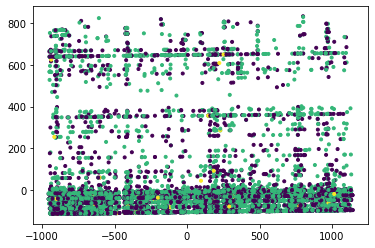

In [45]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
Xtest2d=pca.fit_transform(X_test)
plt.scatter(Xtest2d[:,0], Xtest2d[:,1], marker='.', c=y_pred)
plt.show()

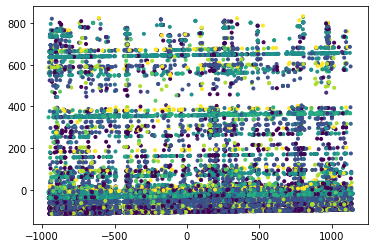

In [36]:
pca=PCA(n_components=2)
Xtest2d=pca.fit_transform(X)
plt.scatter(Xtest2d[:,0], Xtest2d[:,1], marker='.', c=y)
plt.show()

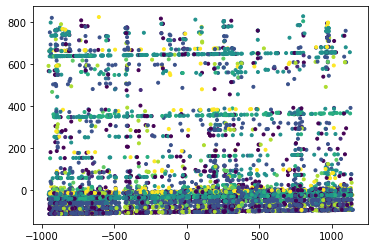

In [38]:
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd']) #labels of crime types
X=new_df #other data associated with crimes
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=66)
pca=PCA(n_components=2)
Xtest2d=pca.fit_transform(X_test)
plt.scatter(Xtest2d[:,0], Xtest2d[:,1], marker='.', c=y_test)
plt.show()

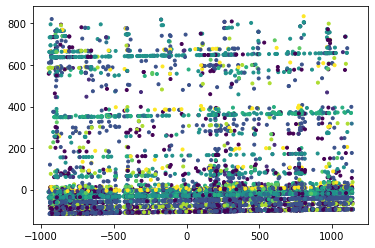

In [39]:
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd']) #labels of crime types
X=new_df #other data associated with crimes
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=90)
pca=PCA(n_components=2)
Xtest2d=pca.fit_transform(X_test)
plt.scatter(Xtest2d[:,0], Xtest2d[:,1], marker='.', c=y_test)
plt.show()

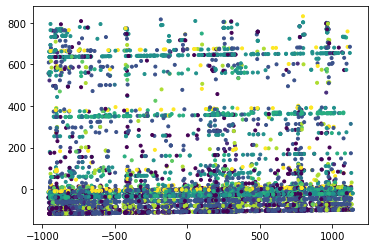

In [40]:
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd']) #labels of crime types
X=new_df #other data associated with crimes
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=91) 
pca=PCA(n_components=2)
Xtest2d=pca.fit_transform(X_test)
plt.scatter(Xtest2d[:,0], Xtest2d[:,1], marker='.', c=y_test)
plt.show()

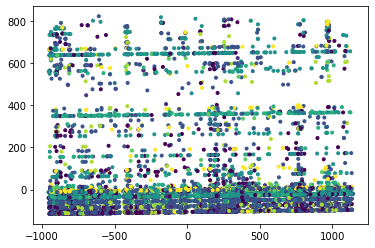

In [41]:
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd']) #labels of crime types
X=new_df #other data associated with crimes
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=5)
pca=PCA(n_components=2)
Xtest2d=pca.fit_transform(X_test)
plt.scatter(Xtest2d[:,0], Xtest2d[:,1], marker='.', c=y_test)
plt.show()

In [51]:
le = LabelEncoder()
#get crime data X and labels y
y = le.fit_transform(crime_data['Crm Cd'])
#split test data and initialize model
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=3)
pca=PCA(n_components=2)
Xtrain=pca.fit_transform(X_train)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=500)
#train and run test data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#get accuracy score
accuracy = logreg.score(X_test, y_test)
print(f'Accuracy of the Logistic Regression Model: {accuracy}')
plt.scatter(X_test[:,0], X_test[:,1], marker='.', c=y_test)
plt.show()

c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the Logistic Regression Model: 0.45406039284667254


InvalidIndexError: (slice(None, None, None), 0)

c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the Logistic Regression Model: 0.45406039284667254


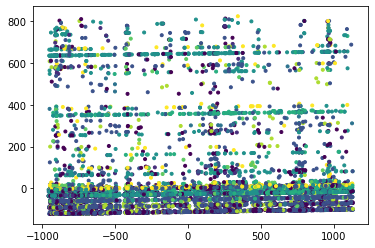

In [53]:
le = LabelEncoder()
#get crime data X and labels y
y = le.fit_transform(crime_data['Crm Cd'])
#split test data and initialize model
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=3)
pca=PCA(n_components=4)
Xtrain=pca.fit_transform(X_train)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=500)
#train and run test data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#get accuracy score
accuracy = logreg.score(X_test, y_test)
print(f'Accuracy of the Logistic Regression Model: {accuracy}')
pca=PCA(n_components=2)
X_test=pca.fit_transform(X_test)
plt.scatter(X_test[:,0], X_test[:,1], marker='.', c=y_test)
plt.show()

Multiclass logistic regression is a valuable tool for predicting crime types, particularly in scenarios where the dataset involves nonbinary labeled data. Using this model allows for the classification of multiple crime categories based on associated features. In running logistic regression, we use identical datasets as the ones previously cleaned. When applied to crime data, our multiclass logistic regression model yielded an accuracy score of 0.4541, signifying its moderate predictive capability in discerning between different crime types. Considering there are 16 types of crime within the dataset, this is a noteworthy score. Despite the modest accuracy, a visualization of the graph shows that the majority of crimes are classified under the two highest crime categories (corresponding to assualt and battery, respectively).

In [25]:
for cval in [1,10]:
    logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=cval, max_iter=100)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    print(f'Accuracy of the model: {accuracy}') #drop codes with less than 500 instances

c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model: 0.45587804163002055


c:\Users\McKay Shields\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model: 0.45587804163002055
